#Impor Pustaka (Library)

In [23]:
# Pustaka untuk manipulasi data
import pandas as pd
import numpy as np

# Pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Pustaka dari Scikit-learn untuk modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [24]:
# Membaca file CSV
df = pd.read_csv('/content/drive/MyDrive/Mecine Learning/Praktikum 5/data/Iris.csv')

# Menghapus kolom Id
df = df.drop(columns=['Id'])

# Cek 5 baris pertama data buat lihat isinya
print("Tampilan awal data Iris:")
df.head()

Tampilan awal data Iris:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Merapikan Data

In [25]:
# Cek apakah ada data yang kosong
print("Jumlah data kosong per kolom:")
df.isnull().sum()

Jumlah data kosong per kolom:


,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [26]:
# Cek berapa banyak data yang dobel
print(f"Jumlah data duplikat sebelum dihapus: {df.duplicated().sum()}")

# Menghapus data duplikat
df = df.drop_duplicates()

# Cek lagi setelah dihapus, pastikan sudah bersih
print(f"Jumlah data duplikat setelah dihapus: {df.duplicated().sum()}")

Jumlah data duplikat sebelum dihapus: 3
Jumlah data duplikat setelah dihapus: 0


In [27]:
# Siapkan alat untuk mengubah teks jadi angka
le = LabelEncoder()
# Ubah kolom 'Species'
df['Species'] = le.fit_transform(df['Species'])

# Simpan nama aslinya untuk nanti di laporan
species_classes = list(le.classes_)

print("\nData setelah kolom 'Species' diubah jadi angka:")
df.head()


Data setelah kolom 'Species' diubah jadi angka:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Melihat-lihat Isi Data (EDA)

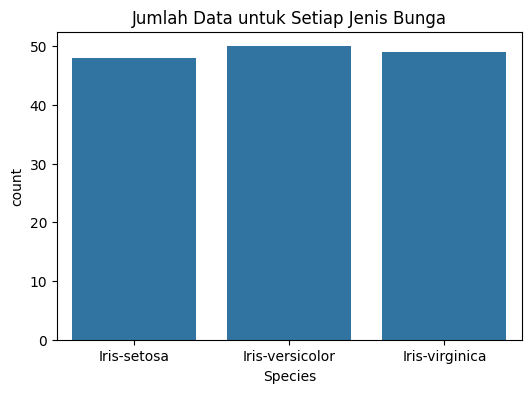

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df)
plt.title('Jumlah Data untuk Setiap Jenis Bunga')
# Ganti label angka (0,1,2) dengan nama bunga aslinya
plt.xticks(ticks=[0, 1, 2], labels=species_classes)
plt.show()

#Membuat Model Machine Learning

In [29]:
#Menentukan Fitur dan Target
# Kolom-kolom ini akan jadi fitur (pertanyaan)
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols]

# Kolom ini jadi target (jawaban)
y = df['Species']

In [30]:
# Membagi data jadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [31]:
# Membuat modelnya
dt_iris = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Melatih model dengan data training
dt_iris.fit(X_train, y_train)
print("Model sudah selesai dilatih!")

Model sudah selesai dilatih!


#Menguji Seberapa Pintar Model Kita

In [32]:
# Minta model menebak data testing
y_pred = dt_iris.predict(X_test)

# Tampilkan hasil ujiannya
print(f"Akurasi: {round(accuracy_score(y_test, y_pred) * 100, 2)} %")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=species_classes))

Akurasi: 96.67 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



#Melihat Cara Kerja Model (Visualisasi)

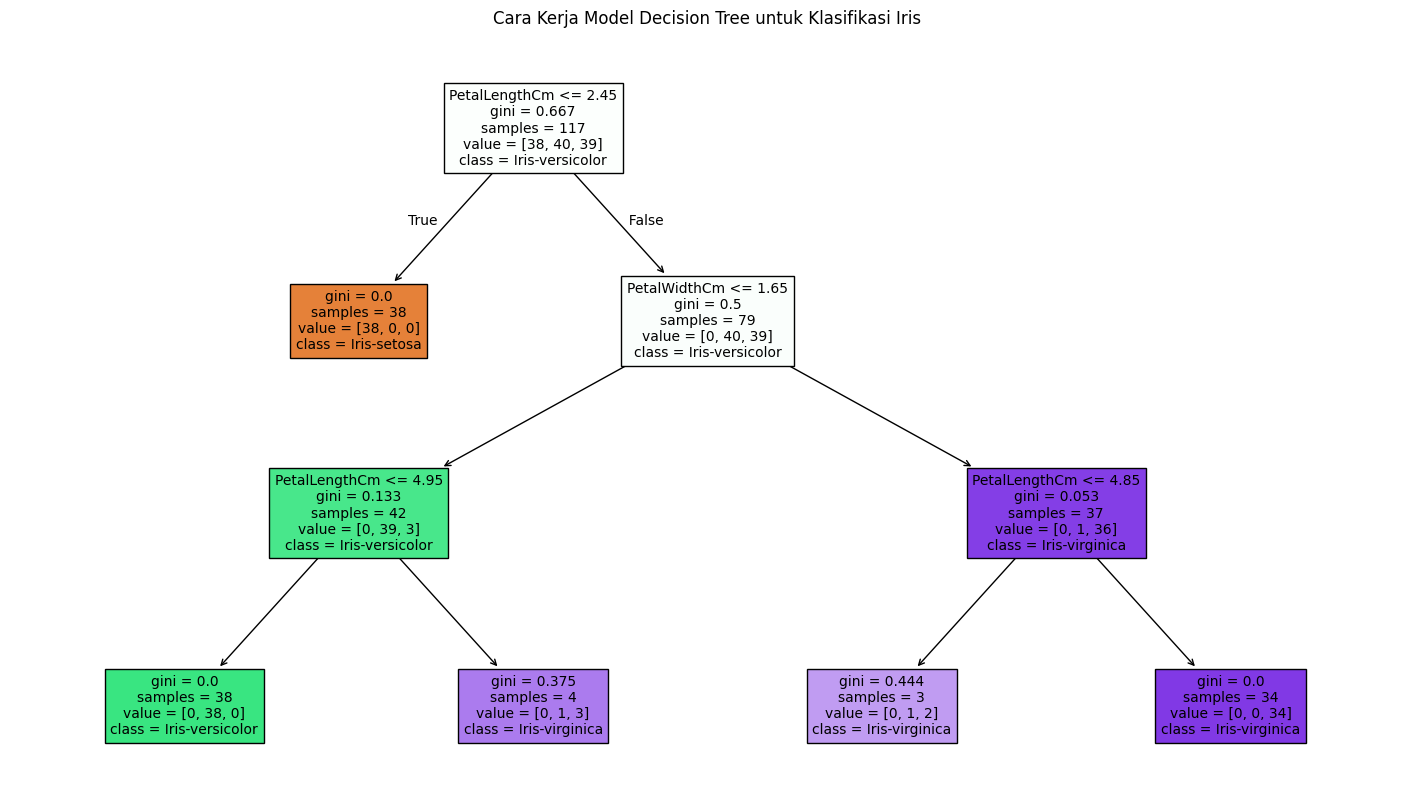

In [33]:
# Membuat visualisasi pohon keputusan
plt.figure(figsize=(18,10))
plot_tree(
    dt_iris,
    feature_names=feature_cols,
    class_names=species_classes,
    filled=True,
    fontsize=10
)
plt.title("Cara Kerja Model Decision Tree untuk Klasifikasi Iris")
plt.show()